<a href="https://colab.research.google.com/github/priyanu17/Regression-using-Neural-Nets/blob/master/Diamonds_Scoring_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
diamonds = pd.read_csv("diamonds.csv")


In [4]:
diamonds.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
diamonds.shape

(53940, 11)

In [6]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
diamonds.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [9]:
diamonds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [10]:
# Checking for duplicate entries: 
diamonds.duplicated(keep = "first").value_counts()

False    53940
dtype: int64

In [11]:
# drop "Unnamed: 0" column

diamonds = diamonds.drop( columns = ['Unnamed: 0'])

In [12]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
# Function to check for constant feature columns in our data.
def find_constant_features(dataFrame):
    const_features = []
    for column in list(dataFrame.columns):
        if dataFrame[column].unique().size < 2:
            const_features.append(column)
    return const_features

In [14]:
find_constant_features(diamonds)

[]

In [15]:
cols_at_end = ["price"]
diamonds = diamonds[[c for c in diamonds if c not in cols_at_end] 
        + [c for c in cols_at_end if c in diamonds]]

In [16]:
# no constant feature columns in the dataset

In [17]:
i=0
for col in diamonds.columns:
  print("Columns no is: " + str(i))
  i = i+1
  print("Column is : " + col)
  print(diamonds[col].value_counts())
  print()
  print()

Columns no is: 0
Column is : carat
0.30    2604
0.31    2249
1.01    2242
0.70    1981
0.32    1840
        ... 
2.70       1
3.67       1
5.01       1
2.77       1
3.40       1
Name: carat, Length: 273, dtype: int64


Columns no is: 1
Column is : cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


Columns no is: 2
Column is : color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


Columns no is: 3
Column is : clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64


Columns no is: 4
Column is : depth
62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
72.9       1
52.7       1
69.1       1
70.5       1
69.4       1
Name: depth, Length: 184, dtype: int64


Columns no is: 5
Column is : table
56.0    9881
57.0    9724
58.0    8369
59.0    6572
55

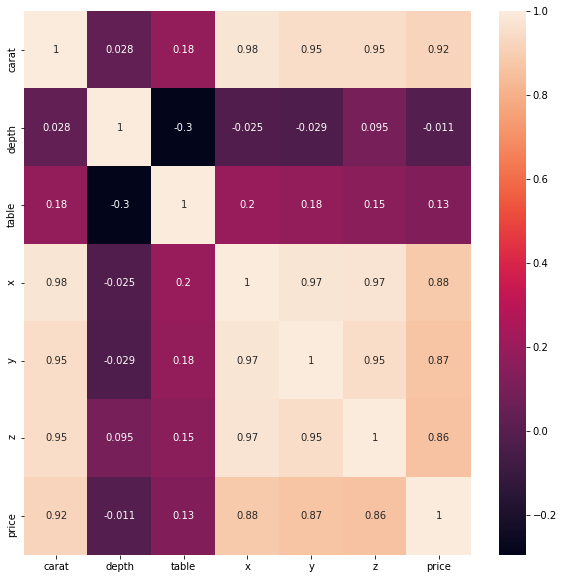

In [18]:
# Data Exploration

plt.figure( figsize = (10, 10))
sns.heatmap(diamonds.corr() , annot = True)
plt.show()

In [19]:
## Some very high correlations can be found in the data

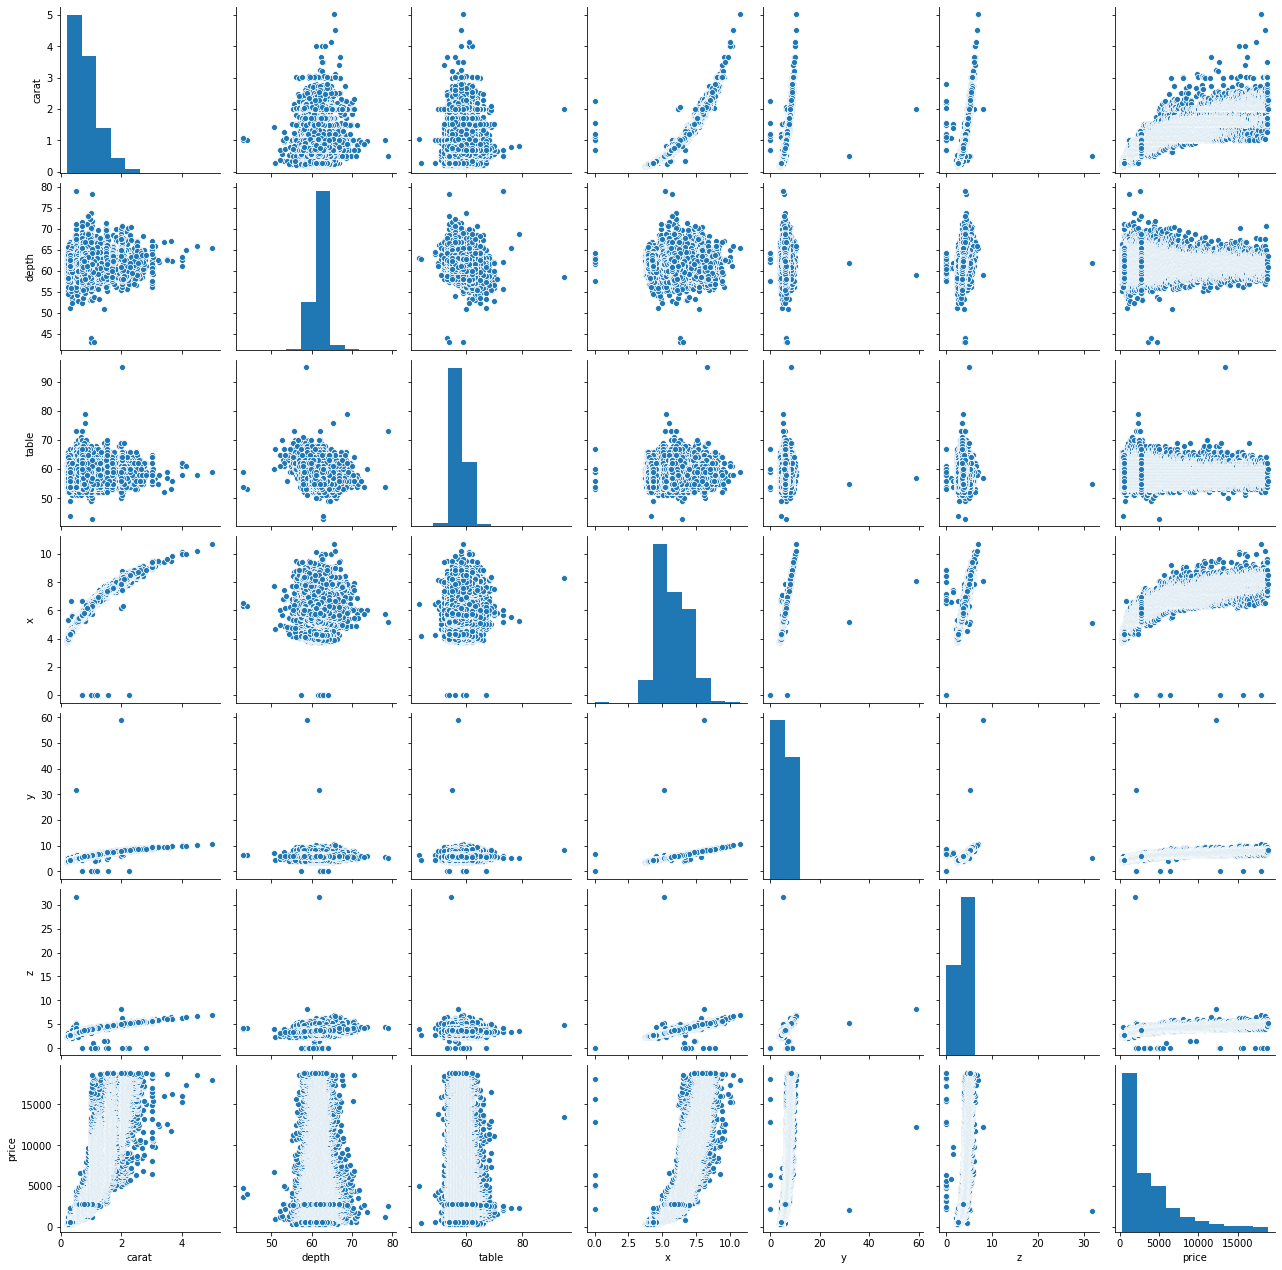

In [20]:
sns.pairplot(diamonds)

In [21]:
print("Number of rows with x == 0: {} ".format((diamonds.x==0).sum()))
print("Number of rows with y == 0: {} ".format((diamonds.y==0).sum()))
print("Number of rows with z == 0: {} ".format((diamonds.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((diamonds.depth==0).sum()))

Number of rows with x == 0: 8 
Number of rows with y == 0: 7 
Number of rows with z == 0: 20 
Number of rows with depth == 0: 0 


In [22]:
diamonds[['x','y','z']] = diamonds[['x','y','z']].replace(0,np.NaN)

In [23]:
diamonds.isna().sum()

carat       0
cut         0
color       0
clarity     0
depth       0
table       0
x           8
y           7
z          20
price       0
dtype: int64

In [24]:
# dropping rows for null values

In [25]:
diamonds = diamonds.dropna()

In [26]:
# low null percentage, hence drop rows with null values

In [27]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [28]:
diamonds.shape

(53920, 10)

In [29]:
diamonds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,0.797698,0.473795,0.20,0.40,0.70,1.04,5.01
depth,53920.0,61.749514,1.432331,43.00,61.00,61.80,62.50,79.00
table,53920.0,57.456834,2.234064,43.00,56.00,57.00,59.00,95.00
x,53920.0,5.731627,1.119423,3.73,4.71,5.70,6.54,10.74
y,53920.0,5.734887,1.140126,3.68,4.72,5.71,6.54,58.90
z,53920.0,3.540046,0.702530,1.07,2.91,3.53,4.04,31.80
price,53920.0,3930.993231,3987.280446,326.00,949.00,2401.00,5323.25,18823.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb0702be588>,
      dtype=object)

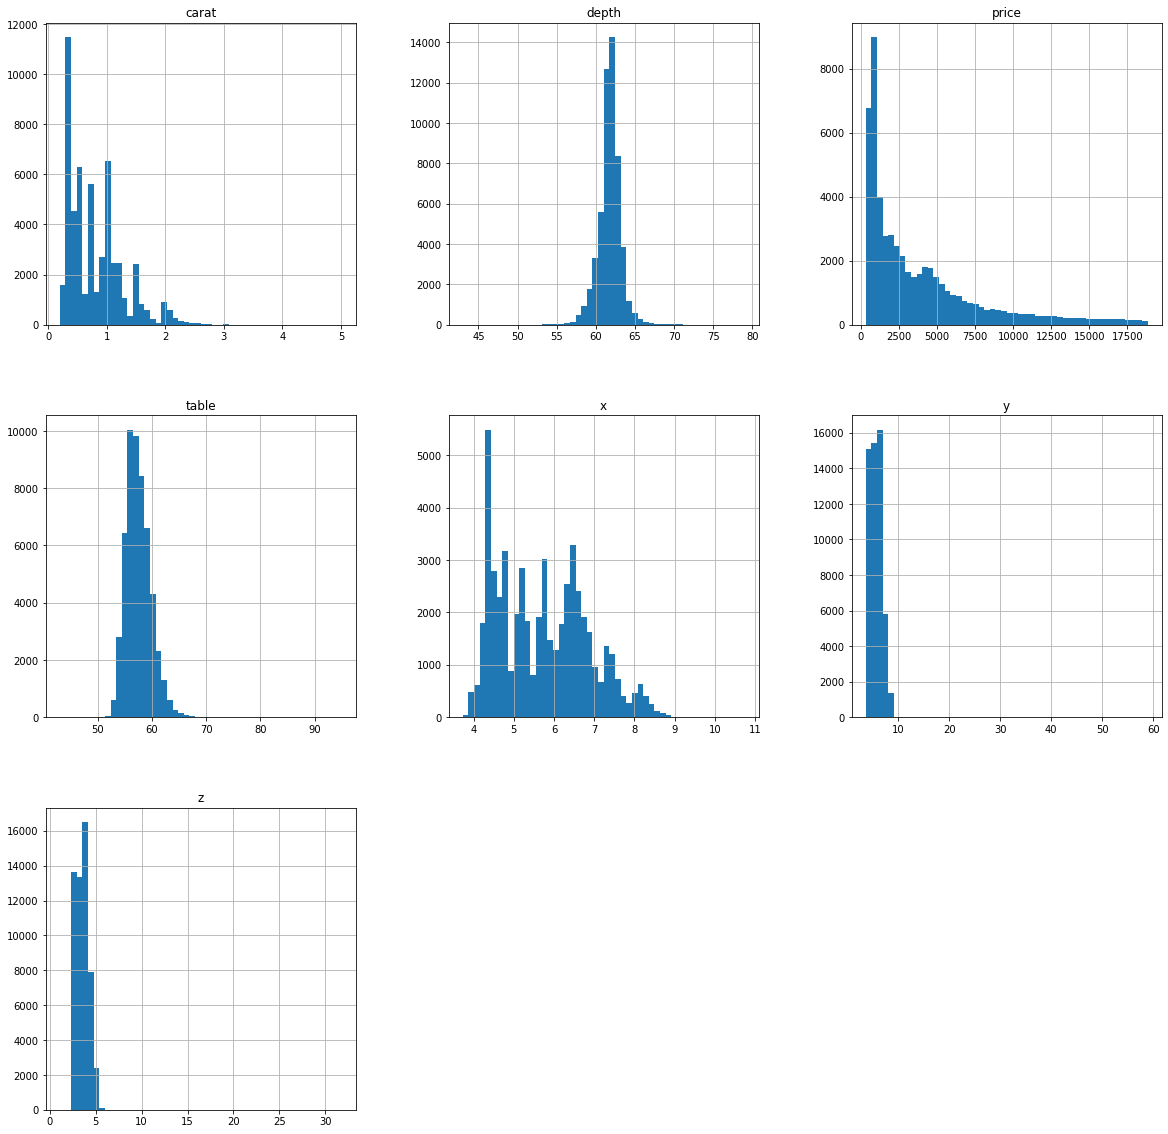

In [30]:
diamonds.hist(figsize = (20,20), bins = 50)


In [31]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

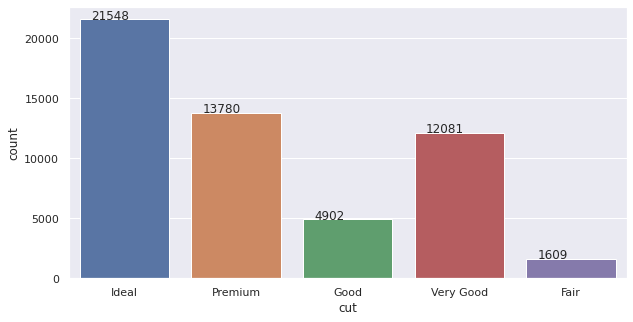

In [32]:
# categorical data plots:
sns.set(style="darkgrid")
plt.figure( figsize = (10, 5))
ax = sns.countplot(x = 'cut', data = diamonds)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

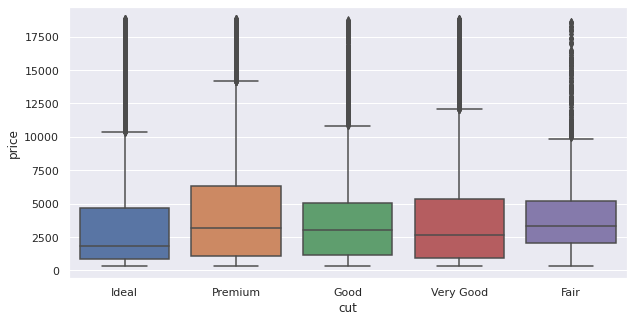

In [33]:
plt.figure( figsize = (10, 5))
sns.boxplot(x = 'cut',y = 'price', data = diamonds)

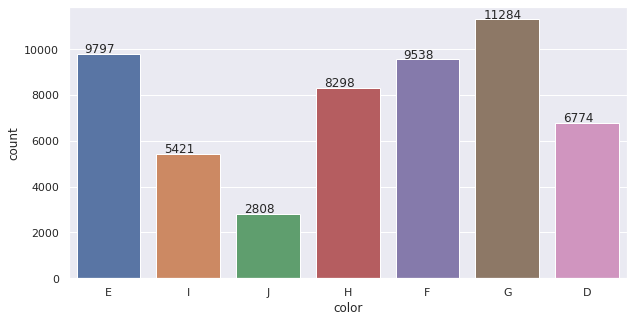

In [34]:
# categorical data plots:
sns.set(style="darkgrid")
plt.figure( figsize = (10, 5))
ax = sns.countplot(x = 'color', data = diamonds)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

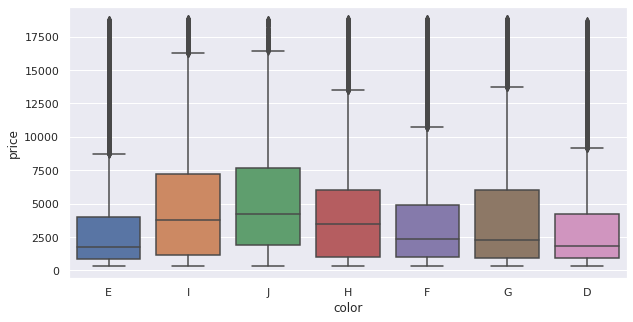

In [35]:
plt.figure( figsize = (10, 5))
sns.boxplot(x = 'color',y = 'price', data = diamonds)

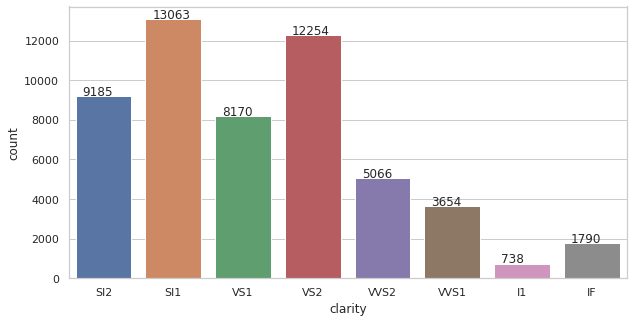

In [36]:
# categorical data plots:
sns.set(style="whitegrid")
plt.figure( figsize = (10, 5))
ax = sns.countplot(x = 'clarity', data = diamonds)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

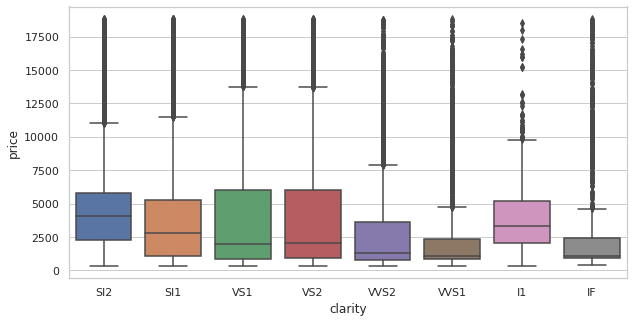

In [37]:
plt.figure( figsize = (10, 5))
sns.boxplot(x = 'clarity',y = 'price', data = diamonds)

In [38]:
diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [39]:
# Data Modelling:

In [40]:
# Model 1:

In [41]:
# seperating the dependent and independent variables

X1 = diamonds.iloc[:, :-1].values
y1 = diamonds.iloc[: , -1].values

In [42]:
print(X1)

[[0.23 'Ideal' 'E' ... 3.95 3.98 2.43]
 [0.21 'Premium' 'E' ... 3.89 3.84 2.31]
 [0.23 'Good' 'E' ... 4.05 4.07 2.31]
 ...
 [0.7 'Very Good' 'D' ... 5.66 5.68 3.56]
 [0.86 'Premium' 'H' ... 6.15 6.12 3.74]
 [0.75 'Ideal' 'D' ... 5.83 5.87 3.64]]


In [43]:
print(y1)

[ 326  326  327 ... 2757 2757 2757]


In [44]:
# Encoding the categorical variables:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough')
X1 = np.array(ct.fit_transform(X1))

In [45]:
print(X1)

[[0.0 0.0 1.0 ... 3.95 3.98 2.43]
 [0.0 0.0 0.0 ... 3.89 3.84 2.31]
 [0.0 1.0 0.0 ... 4.05 4.07 2.31]
 ...
 [0.0 0.0 0.0 ... 5.66 5.68 3.56]
 [0.0 0.0 0.0 ... 6.15 6.12 3.74]
 [0.0 0.0 1.0 ... 5.83 5.87 3.64]]


In [46]:
print(X1[1:2])

[[0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0
  0.0 0.0 0.21 59.8 61.0 3.89 3.84 2.31]]


In [47]:
# splitting the dataset:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1 , y1, test_size = 0.2, random_state = 0)

In [48]:
# applying multiple linear regression:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X1_train , y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
y1_pred = lr.predict(X1_test)

In [50]:
print(y1_pred)

[ 7580.75  1007.25  4958.   ...  1790.   11106.    3675.75]


In [51]:
print(np.concatenate( (y1_pred.reshape(len(y1_pred), 1), y1_test.reshape(len(y1_test), 1)), 1 ))

[[ 7580.75  6099.  ]
 [ 1007.25   923.  ]
 [ 4958.    4276.  ]
 ...
 [ 1790.    1753.  ]
 [11106.   13189.  ]
 [ 3675.75  3138.  ]]


In [52]:
# Evaluating R2 Score on Model 1:
from sklearn.metrics import r2_score
print("RSquared value is as follows : ")
r2_score_multiple_linear_regression = r2_score(y1_test, y1_pred)
print(r2_score_multiple_linear_regression)

RSquared value is as follows : 
0.9173911533445276


In [53]:
# Model 2:

In [54]:
# seperating the dependent and independent variables

X2 = diamonds.iloc[:, :-1].values
y2 = diamonds.iloc[: , -1].values


In [55]:
y2 = y2.reshape(len(y2), 1)

In [56]:
# Encoding the categorical variables:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough')
X2 = np.array(ct.fit_transform(X2))

In [57]:
# splitting the dataset:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2 , y2, test_size = 0.2, random_state = 0)

In [58]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X2_train = sc_X.fit_transform(X2_train)


In [59]:
# Support vector regression:
from sklearn.svm import SVR
# above not able to scale on larger datasets
from sklearn.svm import LinearSVR
svr = LinearSVR(random_state=0, tol=1e-5)
svr.fit(X2_train, y2_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=1e-05, verbose=0)

In [60]:
y2_pred = svr.predict(sc_X.transform(X2_test))
print(y2_pred)

[6786.17014786  804.46972475 4529.85126751 ... 1782.37534634 9084.77598027
 3448.46723847]


In [61]:
print(np.concatenate( (y2_pred.reshape(len(y2_pred), 1), y2_test.reshape(len(y2_test), 1)), 1 ))

[[ 6786.17014786  6099.        ]
 [  804.46972475   923.        ]
 [ 4529.85126751  4276.        ]
 ...
 [ 1782.37534634  1753.        ]
 [ 9084.77598027 13189.        ]
 [ 3448.46723847  3138.        ]]


In [62]:
# Evaluating R2 Score on Model 2:
from sklearn.metrics import r2_score
print("RSquared value is as follows : ")
r2_score_support_vector_regression = r2_score(y2_test, y2_pred)
print(r2_score_support_vector_regression)

RSquared value is as follows : 
0.8645655544601689


In [63]:
# Model 3: 

In [64]:
# seperating the dependent and independent variables

X3 = diamonds.iloc[:, :-1].values
y3 = diamonds.iloc[: , -1].values

In [65]:
# Encoding the categorical variables:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer( transformers = [('encoder', OneHotEncoder(), [1, 2, 3])], remainder = 'passthrough')
X3 = np.array(ct.fit_transform(X3))

In [66]:
# splitting the dataset:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X3 , y3, test_size = 0.2, random_state = 0)

In [67]:
# model building : Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X3_train)
pr = LinearRegression()
pr.fit(X_poly, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y3_pred = pr.predict(poly_reg.transform(X3_test))
print(y3_pred)

[ 7111.0859375    646.80371094  4485.09960938 ...  1485.82275391
 13029.17871094  3199.74316406]


In [69]:
print(np.concatenate( (y3_pred.reshape(len(y3_pred), 1), y3_test.reshape(len(y3_test), 1)), 1 ))

[[ 7111.0859375   6099.        ]
 [  646.80371094   923.        ]
 [ 4485.09960938  4276.        ]
 ...
 [ 1485.82275391  1753.        ]
 [13029.17871094 13189.        ]
 [ 3199.74316406  3138.        ]]


In [70]:
# Evaluating R2 Score on Model 3:
from sklearn.metrics import r2_score
print("RSquared value is as follows : ")
r2_score_polynomial_regression = r2_score(y3_test, y3_pred)
print(r2_score_polynomial_regression)

RSquared value is as follows : 
-0.3707374528813918


In [70]:
# Best results have been obtained with 'Model 1: Multiple Linear Regression'

# Highest value of R2 is obtained with Multiple Linear Regression model